<a href="https://colab.research.google.com/github/hemrajojha/CSC410/blob/main/Unit_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Descion Tree Algorithm - ID3
#Source: https://medium.com/@lope.ai/decision-trees-from-scratch-using-id3-python-coding-it-up-6b79e3458de4
#Colab file: https://colab.research.google.com/drive/1YNBFXqtIOD8VzHE_TbHytybBOSHrZJ7A?usp=sharing

In [3]:
#import the required libraries
import numpy as np
import pandas as pd
eps = np.finfo(float).eps #‘eps’ here is the smallest representable number. At times we get log(0) or 0 in the denominator, to avoid that we are going to use this
from numpy import log2 as log

In [4]:
#create attributes for dataset
outlook = 'overcast,overcast,overcast,overcast,rainy,rainy,rainy,rainy,rainy,sunny,sunny,sunny,sunny,sunny'.split(',')
temp = 'hot,cool,mild,hot,mild,cool,cool,mild,mild,hot,hot,mild,cool,mild'.split(',')
humidity = 'high,normal,high,normal,high,normal,normal,normal,high,high,high,high,normal,normal'.split(',')
windy = 'FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE'.split(',')
play = 'yes,yes,yes,yes,yes,yes,no,yes,no,no,no,no,yes,yes'.split(',')

In [5]:
outlook

['overcast',
 'overcast',
 'overcast',
 'overcast',
 'rainy',
 'rainy',
 'rainy',
 'rainy',
 'rainy',
 'sunny',
 'sunny',
 'sunny',
 'sunny',
 'sunny']

In [6]:
#create dataset
#used dict here, for reference: https://www.w3schools.com/python/python_dictionaries.asp
dataset ={'outlook':outlook,'temp':temp,'humidity':humidity,'windy':windy,'play':play}


In [7]:
#create dataframe
df = pd.DataFrame(dataset,columns=['outlook','temp','humidity','windy','play']) # or df = pd.DataFrame(dataset)

In [8]:
df

,outlook,temp,humidity,windy,play
0,overcast,hot,high,FALSE,yes
1,overcast,cool,normal,TRUE,yes
2,overcast,mild,high,TRUE,yes
3,overcast,hot,normal,FALSE,yes
4,rainy,mild,high,FALSE,yes
5,rainy,cool,normal,FALSE,yes
6,rainy,cool,normal,TRUE,no
7,rainy,mild,normal,FALSE,yes
8,rainy,mild,high,TRUE,no
9,sunny,hot,high,FALSE,no


**ID3 algorithm**

1.compute the entropy for data-set

2.for every attribute/feature:

       1.calculate entropy for all categorical values
       2.take average information entropy for the current attribute
       3.calculate gain for the current attribute

3. pick the highest gain attribute.
4. Repeat until we get the tree we desired

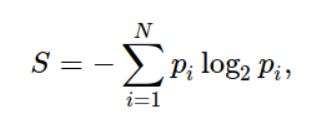

In [51]:
#find entropy for the whole dataset
entropy_node = 0  #Initialize Entropy
values = df.play.unique()  #Unique objects - 'Yes', 'No'
for value in values:
    fraction = df.play.value_counts()[value]/len(df.play)  
    print(f'{value}:{fraction}')
    entropy_node += -fraction*np.log2(fraction)
    print(entropy_node) #added entropies for yes and no

yes:0.6428571428571429
0.40977637753840174
no:0.35714285714285715
0.9402859586706309


In [36]:
variable = 'overcast'
target_variable ='yes'

df[df.keys()[0]][df[df.keys()[0]]==variable][df.play ==target_variable] #variable with yes


0    overcast
1    overcast
2    overcast
3    overcast
Name: outlook, dtype: object

In [37]:
df[df.keys()[0]][df[df.keys()[0]]==variable]

0    overcast
1    overcast
2    overcast
3    overcast
Name: outlook, dtype: object

In [42]:
#define a function to calculate entropy of each attribute
def ent(df,attribute):
    target_variables = df.play.unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like in outlook 'Overcast','Rainy','Sunny')


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
          #frequency of attribute and target values (boolean indexing, pandas dataframe filtering)
            num = len(df[attribute][df[attribute]==variable][df.play ==target_variable]) #numerator
            #print(num)
            den = len(df[attribute][df[attribute]==variable])  #denominator
            #print(den)
            fraction = num/(den+eps)  #pi
            #print(fraction)
            entropy_each_feature += -fraction*log(fraction+eps) #This calculates entropy for one feature like 'Overcast','Rainy','Sunny'
        fraction2 = den/len(df)
        #print(fraction2)
        entropy_attribute += -fraction2*entropy_each_feature   #Sums up all the entropy of attribute like outlook
        #print(entropy_attribute)

    return(abs(entropy_attribute))

In [43]:
df.keys()[0]

'outlook'

In [41]:
#for outlook attribute
ent(df,df.keys()[0]) #outlook

0.6935361388961914

In [46]:
#store entropy of each attribute with its name
a_entropy = {k:ent(df,k) for k in df.keys()[:-1]} #create dict
a_entropy

{'humidity': 0.7884504573082889,
 'outlook': 0.6935361388961914,
 'temp': 0.9110633930116756,
 'windy': 0.892158928262361}

In [47]:
#calculate Info gain of each attribute, IG(attr) = entropy of dataset - entropy of attribute
def ig(e_dataset,e_attr):
    return(e_dataset-e_attr)


In [50]:
#store IG of each attr in a dict
#entropy_node = entropy of dataset
#a_entropy[k] = entropy of k(th) attr
IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}
IG

{'humidity': 0.15183550136234203,
 'outlook': 0.24674981977443955,
 'temp': 0.029222565658955313,
 'windy': 0.04812703040826993}

In [52]:
#as we can see outlook has the highest info gain of 0.24 , therefore we will select outook as the node at this level for splitting

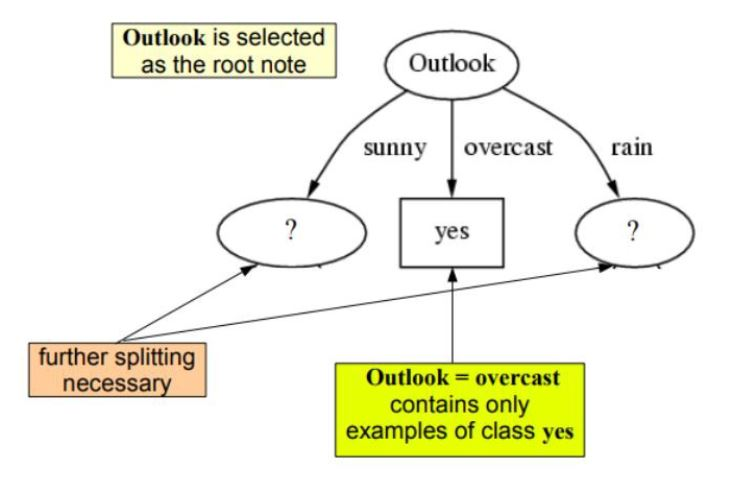

In [ ]:
#Now to proceed our tree we will use recursion

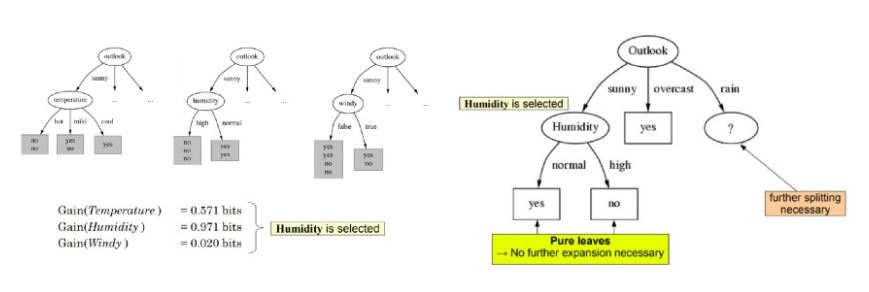

In [84]:
#decision tree full code
def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy
  
  
def find_entropy_attribute(df,attribute):
  Class = df.keys()[-1]   #To make the code generic, changing target variable class name
  target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
  variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)


def find_winner(df):
    Entropy_att = []
    #information gain array for all attributes
    IG = []
    #for all attributes excluding target
    for key in df.keys()[:-1]:
#         Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)] #returns attribute with highest IG, argmax selects key that matches value
  
  
def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)


def buildTree(df,tree=None): 
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    
    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)
    
    #Get distinct value of that attribute e.g Outlook is node and Overcast, Rainy and Sunny are values
    attValue = np.unique(df[node])
    #print(attValue)
    
    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
   #We make loop to construct a tree by calling this function recursively. 
    #In this we check if the subset is pure and stops if it is pure. 

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        #print(subtable)
         #get the most common class value in the subtable
        clValue,counts = np.unique(subtable[Class],return_counts=True)                        
        
        #if the subtable is empty, assign the leaf node to the most common class value
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:    
            #recursively call ID3 to create subtrees    
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree

In [85]:
node = find_winner(df)
    
#Get distinct value of that attribute e.g Outlook is node and Overcast, Rainy and Sunny are values
attValue = np.unique(df[node])
subtable = get_subtable(df,node,attValue[0])

In [86]:
attValue

array(['overcast', 'rainy', 'sunny'], dtype=object)

In [87]:
subtable

,outlook,temp,humidity,windy,play
0,overcast,hot,high,FALSE,yes
1,overcast,cool,normal,TRUE,yes
2,overcast,mild,high,TRUE,yes
3,overcast,hot,normal,FALSE,yes


In [88]:
clValue,counts = np.unique(subtable['outlook'],return_counts=True) 

In [89]:
clValue

array(['overcast'], dtype=object)

In [90]:
counts

array([4])

In [91]:
tree = buildTree(df)

In [92]:
tree

{'outlook': {'overcast': 'yes',
  'rainy': {'windy': {'FALSE': 'yes', 'TRUE': 'no'}},
  'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}

In [93]:
import pprint

In [94]:
pprint.pprint(tree)

{'outlook': {'overcast': 'yes',
             'rainy': {'windy': {'FALSE': 'yes', 'TRUE': 'no'}},
             'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}


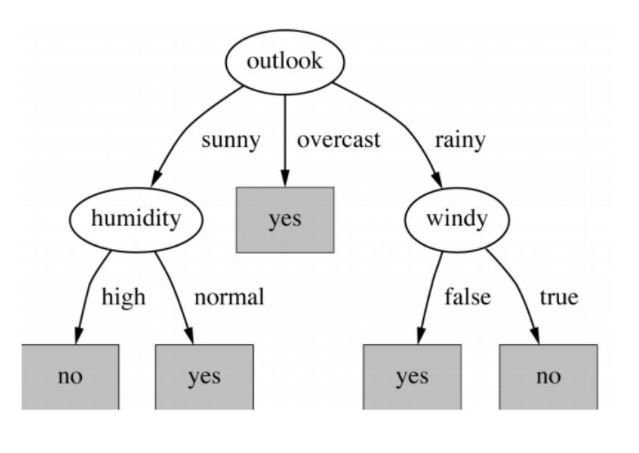